## For, while and if statements

In [3]:
for i=1:4
    print("$i ")
end

1 2 3 4 

In [4]:
for i ∈ [5,10, π]
    print(" $i ")
end

 5.0  10.0  3.141592653589793 

In [11]:
d=Dict("hi" => "bye","where" => "there")
for i in d
    print(i[2])
end

therebye

In [12]:
f=[x*y^2 for x in -1:1, y in 2:4]

3×3 Array{Int64,2}:
 -4  -9  -16
  0   0    0
  4   9   16

In [14]:
i=0
while i<3
    print(" $i ")
    i=i+1
end

 0  1  2 

In [15]:
x=1
if x>0
    print("Great")
else 
    print("Nah")
end

Great

## Functions and compositions

In [16]:
function plus2(x)
    return x+2
end
plus2(5)

7

In [17]:
plus2(x)=x+2
plus2(5)

7

In [21]:
func(x,y)=x*y
func(2,y)

LoadError: [91mUndefVarError: y not defined[39m

In [22]:
f=x->x+3

(::#3) (generic function with 1 method)

In [23]:
f(5)

8

In [26]:
π|>sin|>exp|>log,log(exp(sin(π)))

(2.2204460492503128e-16, 2.2204460492503128e-16)

In [28]:
(exp∘sin)(π),exp(sin(π))

(1.0000000000000002, 1.0000000000000002)

## Default and keyword arguements

In [30]:
function logly(x,y=10)
    log(y,x)
end
logly(1),logly(1,10),logly(pi,e)

(0.0, 0.0, 1.1447298858494002)

In [32]:
function logly(x; base=10)
    log(base,x)
end
logly(10,base=2),logly(10)

(3.3219280948873626, 1.0)

In [51]:
function logly(x::Real;base::Real=10)
    log(base,x)
end
logly(10,10)

LoadError: [91mUndefVarError: Real64 not defined[39m

## Argument passing

In [43]:
function thumbsup(x)
    x+=1
end
y=1;
thumbsup(y)

2

In [46]:
function multiThumbsup(x)
    x[:]+=1
end
y=[1, 2, 3];
multiThumbsup(y)

3-element Array{Int64,1}:
 2
 3
 4

## Vectorization

In [49]:
thumbsup.([1,2,3,4]),thumbsup.([1 2; 3 4])

([2, 3, 4, 5], [2 3; 4 5])

In [50]:
function duplicate(x)
    (x,x)
end
duplicate(1)

(1, 1)

## Multiple Dispatch

In [53]:
function f(x::Float64)
    x
end
function f(x::Int64)
    "$x is not a Float"
end
f(1.0000),f(2)

(1.0, "2 is not a Float")

In [55]:
@code_native f(1.0)

	.text
Filename: In[53]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	popq	%rbp
	retq
	nopw	%cs:(%rax,%rax)


In [56]:
?Val

search: Val values valtype eval evalfile @eval isvalid @evalpoly



```
Val{c}
```

Create a "value type" out of `c`, which must be an `isbits` value. The intent of this construct is to be able to dispatch on constants, e.g., `f(Val{false})` allows you to dispatch directly (at compile-time) to an implementation `f(::Type{Val{false}})`, without having to test the boolean value at runtime.


In [57]:
Val(0)

Val{0}()

## Documentation

In [71]:
"""
example(x)

This function returns the area of a circle with radius r, ``A=πr^2``

* Useful for being lazy
* Other things
# Arguments
* `r` : Radius
# Examples
julia> example(1)->
Area=π
"""
function example(r)
    π*r^2
end

example

In [72]:
?example

search:



example(x)

This function returns the area of a circle with radius r, $A=πr^2$

  * Useful for being lazy
  * Other things

# Arguments

  * `r` : Radius

# Examples

julia> example(1)-> Area=π


## Package implementation

In [2]:
Pkg.status()

INFO: Initializing package repository /home/juser/.julia/v0.6
INFO: Cloning METADATA from https://github.com/JuliaLang/METADATA.jl


No packages installed


In [3]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


4.692207616099232e-8

In [10]:
Pkg.add("SpecialFunctions")
using SpecialFunctions

INFO: Package SpecialFunctions is already installed


In [11]:
airyai(8)

4.692207616099232e-8

In [12]:
Pkg.clone("https://github.com/scheinerman/LatexPrint.jl")

INFO: Cloning LatexPrint from https://github.com/scheinerman/LatexPrint.jl
INFO: Computing changes...
INFO: Cloning cache of DataArrays from https://github.com/JuliaStats/DataArrays.jl.git
INFO: Cloning cache of DataFrames from https://github.com/JuliaData/DataFrames.jl.git
INFO: Cloning cache of DataStructures from https://github.com/JuliaCollections/DataStructures.jl.git
INFO: Cloning cache of FileIO from https://github.com/JuliaIO/FileIO.jl.git
INFO: Cloning cache of GZip from https://github.com/JuliaIO/GZip.jl.git
INFO: Cloning cache of Reexport from https://github.com/simonster/Reexport.jl.git
INFO: Cloning cache of SortingAlgorithms from https://github.com/JuliaCollections/SortingAlgorithms.jl.git
INFO: Cloning cache of StatsBase from https://github.com/JuliaStats/StatsBase.jl.git
INFO: Installing DataArrays v0.6.2
INFO: Installing DataFrames v0.10.1
INFO: Installing DataStructures v0.7.2
INFO: Installing FileIO v0.5.2
INFO: Installing GZip v0.3.0
INFO: Installing Reexport v0.0.3

In [13]:
using LatexPrint

INFO: Precompiling module DataFrames.


In [17]:
lap(2//3)
lap(π)

\frac{2}{3}
\pi


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] num(::Rational{Int64}, ::Vararg{Rational{Int64},N} where N) at ./deprecated.jl:31
 [3] latex_form(::Rational{Int64}) at /home/juser/.julia/v0.6/LatexPrint/src/LatexPrint.jl:141
 [4] laprintln at /home/juser/.julia/v0.6/LatexPrint/src/LatexPrint.jl:258 [inlined]
 [5] lap(::Rational{Int64}) at /home/juser/.julia/v0.6/LatexPrint/src/LatexPrint.jl:265
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##11#14)() at ./task.jl:335
while loading In[17], in expression starting on line 1


## Plots

* Gadfly
* PyPlot
* PlotlyJS
* PGFPlots
* UnicodePlots
* GR

## Hi

## Meta Package
* Plots

In [1]:
Pkg.add("Plots")
Pkg.add("PyPlot")

INFO: Package Plots is already installed
INFO: Package PyPlot is already installed


In [2]:
using Plots

In [61]:
plotly(); plot(sin,0:.1:7)

In [27]:
gr(); plot(sin,0:.1:7)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 6 
 
 
 7 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,192.094 47.2666,173.695 55.1631,155.479 63.0596,137.63 70.9561,120.325 78.8526,103.736 86.7492,88.0311 94.6457,73.3655 102.542,59.8862 110.439,47.7279 
 118.335,37.0121 126.232,27.8457 134.128,20.3205 142.025,14.5116 149.921,10.477 157.818,8.2571 165.714,7.87402 173.611,9.33159 181.507,12.6153 189.404,17.6922 
 197.3,24.5118 205.197,33.0057 213.093,43.0892 220.99,54.6615 228.886,67.607 236.783,81.7963 244.679,97.0877 252.576,113.328 260.472,130.356 268.369,148.001 
 276.265,166.086 284.162,184.431 292.058,202.852 299.955,221.166 307.852,239.19 315.748,256.743 323.645,273.65 331.541,289.742 339.438,304.858 347.334,318.848 
 355.231,331.571 363.127,342.901 371.024,352.724 378.92,360.942 386.817,367.472 394.713,372.251 402.61,375.229 410.506,376.378 418.403,375.685 426.299,373.158 
 434.196,368.822 442.092,362.72 449.989,354.913 457.885,345.479 465.782,334.513 473.678,322.124 481.575,308.435 489.471,293.584 497.368,277.719 505.264,260.999 
 513.161,243.59 521.057,225.666 528.954,207.407 536.85,188.995 544.747,170.614 552.643,152.448 560.54,134.677 568.436,117.481 576.333,101.029 584.229,85.4883 
 592.126,71.0122 
 "/>
 
 
 
 
 y1


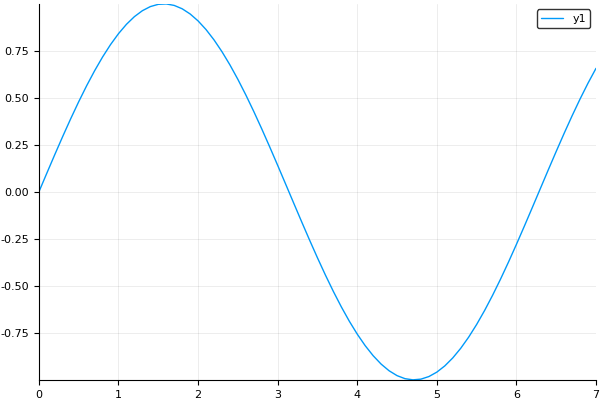

In [3]:
pyplot(); plot(sin,0:0.1:7)

In [32]:
Plots.PyPlot.xkcd()

PyObject <matplotlib.rc_context object at 0x7f1d2ff98c10>

In [33]:
plot(sin,0:0.1:7)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 6 
 
 
 7 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,192.094 47.2666,173.695 55.1631,155.479 63.0596,137.63 70.9561,120.325 78.8526,103.736 86.7492,88.0311 94.6457,73.3655 102.542,59.8862 110.439,47.7279 
 118.335,37.0121 126.232,27.8457 134.128,20.3205 142.025,14.5116 149.921,10.477 157.818,8.2571 165.714,7.87402 173.611,9.33159 181.507,12.6153 189.404,17.6922 
 197.3,24.5118 205.197,33.0057 213.093,43.0892 220.99,54.6615 228.886,67.607 236.783,81.7963 244.679,97.0877 252.576,113.328 260.472,130.356 268.369,148.001 
 276.265,166.086 284.162,184.431 292.058,202.852 299.955,221.166 307.852,239.19 315.748,256.743 323.645,273.65 331.541,289.742 339.438,304.858 347.334,318.848 
 355.231,331.571 363.127,342.901 371.024,352.724 378.92,360.942 386.817,367.472 394.713,372.251 402.61,375.229 410.506,376.378 418.403,375.685 426.299,373.158 
 434.196,368.822 442.092,362.72 449.989,354.913 457.885,345.479 465.782,334.513 473.678,322.124 481.575,308.435 489.471,293.584 497.368,277.719 505.264,260.999 
 513.161,243.59 521.057,225.666 528.954,207.407 536.85,188.995 544.747,170.614 552.643,152.448 560.54,134.677 568.436,117.481 576.333,101.029 584.229,85.4883 
 592.126,71.0122 
 "/>
 
 
 
 
 y1

In [36]:
histogram2d(rand(500,500),nbins=10)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 100 
 
 
 200 
 
 
 300 
 
 
 400 
 
 
 500 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
<image width="493" height="369" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAe0AAAFxCAYAAABeEPDDAAAIh0lEQVR4nO3Xv6vddx3H8XvLJS23
EG5DQO9NSUopOilFS0NcKh1axwwZCy6iDhUyCgU3KTgFkYqucQypOIqDixb7Y9EOWosmIb1XUcIl
aCBBcv0X/BTk3Wfv4/EXvDh8vufJe/P6s68cbcR8/Y/vTE9Y9vrZr05PWHb73onpCcuuHd6cnrDs
7MPd6QlLXv3cv6cnLHv7n09MTzgWit/fh//6xeb0hhWPTA8AAP43og0AEaINABGiDQARog0AEaIN
ABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0A
EaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQAR
og0AEaINABFbL1z43fSGZa/fe3F6Ap9Ql/d2pyd86r1569T0hGXnT9+fnrDs+u3pBR+DM/D/zk8M
ABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0A
EaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQARog0AEaINABGiDQAR
og0AEaINABGiDQARog0AEaINABGiDQARog0AEZvfffI7R9MjjoNrhzenJyy7vLc7PWHZlf2D6QnL
fvDMyekJS7741F+mJyz7x51T0xOWHdzdmZ6wrPg2nvn5bzenN6xwaQNAhGgDQIRoA0CEaANAhGgD
QIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANA
hGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CE
aANAhGgDQIRoA0DE5vVnXzmaHnEc7J48nJ6w7ODuzvSEZfv3Hp+esOzK/sH0hCWXds5NT1h27fDm
9IRlF048NT3hWLh654eb0xtWuLQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQB
IEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEg
QrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgYmv35OH0hmUH
d3emJyx77d0z0xOWPX/qxPSEZR/d25yesOzy3u70hCVX9m9OT1hW+403NjY2rt++Pz1hWfE/Y+PO
9IA1Lm0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBt
AIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0A
iBBtAIgQbQCIEG0AiBBtAIgQbQCIEG0AiBBtAIgQbQCI2Hrp7T9Pb1j2ma3PT09YduGxU9MTlj1/
+s70hGW7Jw+nJyw7uLszPWHJpZ1z0xOWffmzf52esGxvu/UuNjY2Nt689ej0hE89lzYARIg2AESI
NgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYARIg2
AESINgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYARIg2AESINgBEiDYA
RIg2AESINgBEiDYARIg2AESINgBEbF3cfnl6w7Lzp+9PT1h2Zf/G9IRl5+/tTk9Y9qMPHp+ecAw8
mB6w7MntM9MTln37ez+bnrDshd/sTU9YdvXH0wvWuLQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQB
IEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEg
QrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBCtAEgQrQBIEK0ASBC
tAEgYnN6wMfx4cWvHE1vWPXNX35hesKyW48cTE9Ydmnn3PSEZd947r3pCUuKb/mdh7+enrDs4vbL
0xOWvfXgxvSEZX//z5+mJyxxaQNAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANA
hGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CE
aANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0CEaANAhGgDQIRoA0DE5ovb3zqaHnEc
/PSlP0xPWPa1X52enrDs6pceTk9Y9tq7Z6YnLPn+cx9NT1j2xvtPT09Y9taDG9MTll3e252esOzV
D36yOb1hhUsbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQb
ACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsA
IkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIkQbACJEGwAiRBsAIrbOPPbo9IZj4fc3np6esOzSzhPT
E5a997cH0xOW1b7BN97vveWisw93pyfwCeTSBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaA
CNEGgAjRBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI
0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaACNEGgAjRBoAI0QaAiP8CrgSK
htaEME4AAAAASUVORK5CYII=
" transform="translate(39, 8)"/>
 
 
 
 
 
 
 
<image width="18" height="369" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAABIAAAFxCAYAAAB+2fgXAAACF0lEQVR4nO2cwW3EMAwEqcD9V3Fd
3oVMCbrHIBgsqAIWGu6Skg3Y59OvKWD9ECJVVU/PhxEaSIhDm85FW9fuQrk1KqpGlBCIRrkmRONc
eyNCwa4J7T/zywhVM0IgGrQjIVpRrlE1IueRDE1o/+lmhHxoOvtJNMg1I5qs17AWEdpvbFoMzeaa
btQKaxRsfzXyZqyeGh8a5hpTIyXa1uguhOigaJAQ1LNGtGDXimm1eqYPImSskQ5thtmREI3aEVYj
IVo1s6nkGgnn0VCu6dCoHW2yvxAaqEZ7HN0XVmxhILGmHWqwGe2PvY1ssr8QEqLJXDPeRji02JNW
mOzcQDZ288+t0Sb7/4TIZMvQhDVatLsQlSMhms8133EUbH8wmjHZFFrlonHJRnSMyfY1bUOBjG5a
HxolFJxsatQK0agJKTyOuEAiMtFoxsHGXbSYtWj35UPbmX1fQjTqMkrObEjIF0iw1yihYPsZHeXM
1j2ug/cjRkj4uA4eR8wyHkc6+8FnWkQn+TgSBj

In [39]:
scatter(rand(50),rand(50))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1

In [40]:
contour(-10:10,-10:10,(x,y)-> ((x+y*im)^2|>abs),fill=true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
<image width="493" height="369" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAe0AAAFxCAYAAABeEPDDAAAgAElEQVR4nOy93WLcMGw1CMpud/f9
X2Hf8eu2sbgXEkgQOABJeZxkUpyLzEgEQUrxCMJ/+XX+v5U2cdZf1+fXf12f53+1Y/5Ov+7Pm7Yd
f/2f9r18/ff1+eu/4TGdX1R+/U/7fo39D6DhNZj2HGjpPImY5utroKFf4Pgct87HxMeVqP4q99j1
Wb+O8bgWol8f/bsca3M++vF5DLQVzK2apq11CJpy35YPh5aPj3CMj9s5Rcs4a8DH+bzm2XPemnJM
zvV46/1pWr2H2VjEfzam+bQ5ZO/FTyHan0Yp248DIiI6nHmFfH5ojre+PK/n6Tly3I6d7hgfI/48
5s1B+9NjA58D8+P9lcOu2eeend/hjzGf4+PLnLsW47lgzZsP0zAPEjR00xyfN63g03iLecP1fop9
fqp9ffDNuNl+9u/0efCNuo8/+/HH/f3zZnDctJ//QUREtR1/gnP/eR238x/93E1TG81/3vv8z37u
4/+6z/3fN7//597DZztf7rGDP4/x+OM+nuGYkyQSiUQikfgbkEI7kUgkEok3QQrtRCKRSCTeBCm0
E4lEIpF4E6TQTiQSiUTiTZBCO5FIJBKJN0EK7UQikUgk3gQptBOJRCKReBN8fnExlA3U8y6uIoqq
tONWROX+PLmoyf+5Pn/917Soiiyo0ouonA7N2YqqtCIrdyGWVlDlPHtRFVRMZTgmqrqYChdb+Srt
2BRTUcd0Hu1cK0hSx+OhgEorvHIM/IZCJ6CYysCv9gIs55cuxGILs7hjVfLjgiYjDWPg43yiQipR
ARVURMWb4+2rj68VUPEKuSBaDVkoJVrf438+q2eyjL3iKg/XcCZGxVoqKLxSKqaXBU/qpLhKDYqr
yH16hU0Qf10wRfMoYH+6WMtQXKVifvUuGlJqHQqtDGvd/5+lVCr1dMeuY1tMps3hP7yDf1e1F1ph
PjcNcylnbUVViH+nPMYFT2rtz1M5j4gqF39p11up3Bz4sdYK8vAyRL3QCp/U6uYB9M9D7YGLpAzn
PoZz7a/jOPu544MQqqQX58Y9/IcZOzXNJj5Z4O6gOhXR6Nd/dWH96xbSqiJa+frvubDm46Aimqx+
5lVEawK5nv17E+T3Lfx108oqaHxX2/T7v+aXrHamhAWqYCYrnkk+QDDrqmmnnlsPKKR5Ph8/qojm
VD2Lqp0xUAUzLaSRsPWE9hlUREMC2quspse9vSM6IiuIQ6EdVkSbz/npimhn8FKhcThCcwYt6BjR
SwAS9J6QlwJeC3ZdwSwW2nOBjoS5FsR67QL48qec61VL09dWSh0EOO+DaBTinpDWQhydg0JcCPCL
5q561i74bH+7Rf9xC8HcBHibd9Pqv3X5f9m+j4K5UG3fuyDlSWPFtZG3EuS30C6CD+mXiMZfCOrj
y/LW9M75XlbTjj0V3p/nCzTtQbtmYa00bSmgp8KaNefzSwhwFsRM+6ufV+fak/JLHDfBzpr1fS2o
VCn/fQWlSvt3LYC7Vn3+UjSOYEYlSuUY8420Zj5e1rSlcHS06UiLZtRapkJ6t4yppz2jOTOhvSqY
Z2VLI234SRlTKUh3NOEn2Hkp8ITvdA2nXGn0EoDW8oR8pCFrjV0K9ScCHQnzrjWf0zlRGVNPC9d7
ugSyEv5AiEda+HUcaNqR5q608KZN1yLGlNiRGrj+wfD/CdDAq/hORPBYv6h1rVytPewHv1SM83xN
mxRNBFd4n1Zo6zm7wjt92olEIpFIvAm+ZR6H/mseAxp2O2afs/os6pPOL6ths29bnvc0bOmvXtGw
iWipGcjXEWrY7djRsFnrlcemIUfgr94yeT/wVw9rTjRtZM6e+bZjfgek3+Uj99doA5P3TLN+ok0T
+abp32ke39Hkn5rsvLf/M1oaKOEuH0F86P9HzUMM6//HSEs5HZpTnDvV6AHumMcnWnNlf5rxSQcd
52hKtnOObl04+rnreHQN0hGN8aIn4FOH40Jnt0yrP4DmV+bn7edJhV2Ln+wC5QYdHMdEVO++G7oB
DfMpn9RdnQytfd886Bc4x9fCcubzP7p8Ypxs/WQ59dFpbvlmNG5uKHL+IipsER7Z7mrcn/WB0O7B
ZcB/vdLBy+nYZX3a1vQNzeRe565BaN9bfEGQWf36GL+TEHQwEC02j19m6EONRYFovplcm9ef+KuR
CX2nK9fMt83rI34nWFOuZfnc5xzhuCqYZ4FnkV/4iUAfrsGd/RpsBaK9eI0wEA2MrZjZbaCY5rtm
Svd84ygQLTKd6/M6oE2awr3OXfraIv/3rt+7X+88aM0b6z7tEvq7ia6/hcjffe1P/KfxXvke/FSw
mtqnBDKXh6Z3Q/Nlxga+4hzycw/jE3zSd4Q28F8vRYY3oe35tEUUOAtrE2QmWm16EeEiyMxo1t8I
Mqu/jvbXE/mtrV/a91trwWkD0fY07ZNpH/irpdBc8WnPhPROAFkciGYF9DwQbdwr4kdkhfJMiEe0
w7yFOT+uaW+IYi96e7qGF4gWzQHX7QaiifNasGu/+ei31nzmAh0Jc19o2/NakEshjiLKJVb837t+
78bb8XdLQe2NdR5n6O8mojHCnKEiztUPc6TVfxevClZrewnsGeKFoa0qAtg0+lp+hLmeG/m5V5A+
7UQikUgk3gSf9ETq8xzgv9YaNvJfTzXsIZ0r0LD5vJdzzS93Z/8eathERL9E+hXSsIkIRoYjc7ae
r/Ks6y9p+tZa+APzuNBSv2YpX0CjRZryE5+21qx3or6v6HFs8sZ8yJxDc4hibXoaPQ65x2sjvm1O
ELn+auzkgR8PE7VRzjVRrLnD6HGPVtyjKI2LSPm/H2jhSAPvmuuKpq20X8HXM523/aKcbpA6xrSR
6Zyoa95E1mS+Yx5vPIA2zpqfNJvz/D4mtHAiok+2hn7073Q9s8r9kK7iuFL3l19j+rhgkzkRNWMD
y4dP6j5s7WBufu//Eeb5UbeFGjf73JXfW/q62zzp5ybqvu6TF4/x2UzcOwC510QE07mQ/3omrJF5
vAliVCQFmMPlNumkLqy/EWQm/ddVmb6RKbynXeFiKNLv/Mg8rj/Pni5lUr7A50qq1opPeyako+Iq
KA3LN52TOc+0TwK+Ir/ylnn8QXGVwTr42JO8hh2ftid8Z/BeDKKXgJ3iKoOw1WPq+pAAbftcEOhI
mDch6KSXoeIvSNh6pnM0N0odY9rIdC73N+7VL9qyZB5Xgr2NCbN5Vfd2miZG1HzZTUSK9LAoHYyP
uyma16KRBpnLPVO52BcqynKtY2HM4cLXjUzliO8M3/JpI/81qmo20Pz6n7mwHqqdiQIpRLhIyi2s
VyLCvxVkJjRno0UDrdrMVxqyFKxLmjYQ0tctAMVVHAEvBeITn/apChYg4e/7toXQJkdo1+Jqz0hA
e8Jfj1/zgjHw8oDWRghzuFdeJvzpL8HvCETTEd1t7eCRhO6bJ+SjADITOCbHHgh0JMx5W7ogDBLm
WpCPQhtr4ZofKugCfdqBFq6vd+b3Lkc1AnlF09b8pd+7+btVpTWpgbcnSvt933OeBqu1var/xyG3
OyjKIomJjE9bznAtQ+0arK/7u8I7fdqJRCKRSLwJPsvX/7c/S2vP0n+tc6+B/7qlbZ3aB62PT6th
t7H7veTX6WrY22lc93GkYfNxpGFfx8eSD5rPm

In [43]:
heatmap([exp(-(x^2+y^2)) for x in -1:0.1:1,y in -1:0.1:1])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
<image width="493" height="369" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAe0AAAFxCAYAAABeEPDDAAAN8ElEQVR4nO3dTXIbaXqF0QsgwT+R
lLpU6h6UwxEeeD3e/wJq4C6pJJHiLxKAN+E7eCPOWcAFAsj8HuQIm/++/Z9ziu5O973tXNe2k+R+
t69t3y272naSfFhmbifJzdK7JC+31cs9S3F/m+57P2VT215Pve0keSvuP6/d9/60ztxOksf1WNt+
OB5q20nymJfe9vahtr2tLQMA/69EGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhRBsA
hhBtABhCtAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIZa70331BT7mprb9adnXtpPkft/7TfPpojad
JPm4P9W27/bH2naS3C69/atd970v297nvt2ca9tJcjpvatvrqft88Hrc1bZ/rb3tJHk89PZ/Hrqf
+/69996XQ+96TJLtWtzvHQOetAFgCtEGgCFEGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjR
BoAhRBsAhhBtABhCtAFgCNEGgCFEGwCGEG0AGEK0AWCI5S7X1Rf4tOxr2/+46P7m+O2yt/35Yu2N
J/nt8lDbvt/3tpPk7uKttn29f69tJ8nF0vtet5tzbTtJTudNbft9XWrbSfJyuKhtP74XD4IkD4fe
GXn91ttOkv22973uNu1nyt5nc1p7XfWkDQBDiDYADCHaADCEaAPAEKINAEOINgAMIdoAMIRoA8AQ
og0AQ4g2AAwh2gAwhGgDwBCiDQBDiDYADCHaADCEaAPAEMv9rvsn6ff73u+C37r/TZ9/Xq617S9X
b7XtJPl89VLb/sfNU207Se6un2vb1+XPfX/xXtvebk+17SQ5nXr36uH9oradJC+vvcPg8eWmtp0k
358/1LYvtte17STZbZrrS3M8x3Pvel/Pva560gaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhhBtABhC
tAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhlrtlV32BTxe97c8Xa288
yZert9r2v26eattJ8uXuZ2374/1jbTtJbj8+1Lav7p5r20myFK+Zze5U206S87H3G359vaxtJ8nr
401t++bnfW07Sa7277XtZdu9ZpqO5+7+4bQUt3td9aQNAEOINgAMIdoAMIRoA8AQog0AQ4g2AAwh
2gAwhGgDwBCiDQBDiDYADCHaADCEaAPAEKINAEOINgAMIdoAMIRoA8AQy4fe/4AnST7ue3/C/tvl
obadJJ+vXmrbX+5+1raT5PNv32vb91/+rm0nyfXvP2rby6en2naSbG6Ove3yvXpei9vPu954kssf
H2rbF19fa9tJsizFD75sPfWe+96L20nycuztP6+9bU/aADCEaAPAEKINAEOINgAMIdoAMIRoA8AQ
og0AQ4g2AAwh2gAwhGgDwBCiDQBDiDYADCHaADCEaAPAEKINAEOINgAMIdoAMMTyYem+wN3+WNu+
3x9q20nyj5un2vbH+8fadpLcf/m7tv3hj79q20my/Oultr35/UNtO0nOt3e97WVf206Szdq7n7a/
utf79utDb/uye840rWv3gH89XNS2n4rbSfKw7302D4fe87AnbQAYQrQBYAjRBoAhRBsAhhBtABhC
tAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhlhulnP1BW6XY237
7uKttp0kd9fPte3bjw+17SS5/v1HbXv510ttO0nyH59r0+s//6htJ8nxrvfes1z2tpNk7d1Pu8dv
te0k2V39Wdte0n3v12+9e/X2+aq2nSTPz9e17buXm9p2kty+X9S2b5altu1JGwCGEG0AGEK0AWAI
0QaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhhBtABhCtAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIUQb
AIZYLrfn6gtc7Y617ev9e207Sa6v3mrbV3fPte0kWT491bY3v3+obSfJ+s8/ettf/qu2nSSn2957
z9L93LP2rpnz1Z+17bbl9bW7/9D73K++d8+Z6++9M7J9vjfb1OyqJ20AGEK0AWAI0QaAIUQbAIYQ
bQAYQrQBYAjRBoAhRBsAhhBtABhCtAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYYlm2
5+4LbE+17YtlrW0nyf7ivba9XL3VtpNkc3OsbZ9v72rbSXK8+1zbPt3+UdtOkuXDf9a2d7ub2naS
HI/Pte3unZocXx9q27vbf9e2k2Rz81Tbbp8zzTOyfb4329TsqidtABhCtAFgCNEGgCFEGwCGEG0A
GEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhhBtABhCtAFgCNEGgCFEGwCGWLbp/Vl3kmw3
xT8DL24nybb4J+mbXW87STZLb/u87HvjSbJcFrc/9LaT7HY3ve2lt922lj/35jXTvt6b92r7nGme
kfXzvdmmYlc9aQPAEKINAEOINgAMIdoAMIRoA8AQog0AQ4g2AAwh2gAwhGgDwBCiDQBDiDYADCHa
ADCEaAPAEKINAEOINgAMIdoAMIRoA8AQyymb6guczr395naSnE693zTnY/f30nntbW/WQ288Sda3
4vZTbzvJ8fhc3W+qvvfy5968ZtrXe/NebZ8zzTOyfr4321TsqidtABhCtAFgCNEGgCFEGwCGEG0A
GEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhhBtABhCtAFgCNEGgCFEGwCGWNZT94/G1+Kf
pL+vS207SQ7vF7Xt9fWytp0k5+ddbXv767G2nSS7x2+17fPVn7XtJFmb28uH4nqS9ak2vf3V/dyb
18ymfL2fivdq+5xpnpHt873ZpmZXPWkDwBCiDQBDiDYADCHaADCEaAPAEKINAEOINgAMIdoAMIRo
A8AQog0AQ4g2AAwh2gAwhGgDwBCiDQBDiDYADCHaADCEaAPAEMvbaVN9gdfjrrb9criobSfJy+tl
bfv18aa2nSSXPz7UtrdfH2rbSbK7+rO633R8LX42S+96TJKsb7Xp3eO32naS7P7du2bOX59q20my
/rivbbfPmeYZ2T7fm21qdtWTNgAMIdoAMIRoA8AQog0AQ4g2AAwh2gAwhGgDwBCiDQBDiDYADCHa
ADCEaAPAEKINAEOINgAMIdoAMIRoA8AQog0AQyzPa+/PupPk19r7o/HH994fsCfJ40vvD+Rvfvb+
+D5JLr6+1ra3l4fadpIs+dbbfu19Lkmyu/13bfu87GvbSbJZe9/r5tdjbTtJzl+fatvr/17XtpPk
5eun2vav8jnTPCPb53uzTc2uetIGgCFEGwCGEG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAh
RBsAhhBtABhCtAFgCNEGgCFEGwCGEG0AGEK0AWAI0QaAIZantfsCj4ddbfvhsK9tJ8n35w+17av9
e207SZal/MUWXb/9qG0vD0+17STZ3PT2N0ttOklyLl4yp+feOZAk64/72vbL10+17SR5+Ou32vbP
h7vadtI9I9vne7NNza560gaAIUQbAIYQbQAYQrQBYAjRBoAhRBsAhhBtABhCtAFgCNEGgCFEGwCG
EG0AGEK0AWAI0QaAIUQbAIYQbQAYQrQBYAjRBoAhlqe1+wI/D73fBddv+9p2klx

In [44]:

plotly(); surface([exp(-(x^2+y^2)) for x in -1:0.1:1,y in -1:0.1:1],aspectratio=1)

In [17]:
pyplot();
 anim= @animate for i in 1:50
    plot(x->sin(x*π*i),0:0.1:2*π)
    end

Plots.Animation("/tmp/tmpsK06Jc", String["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

In [19]:
gif(anim,fps=3)

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [10]:
?gif

search: gif @gif signif significand getaddrinfo SegmentationFault



No documentation found.

`Plots.gif` is a `Function`.

```
# 2 methods for generic function "gif":
gif(anim::Plots.Animation) in Plots at /home/juser/.julia/v0.6/Plots/src/animation.jl:63
gif(anim::Plots.Animation, fn; kw...) in Plots at /home/juser/.julia/v0.6/Plots/src/animation.jl:63
```



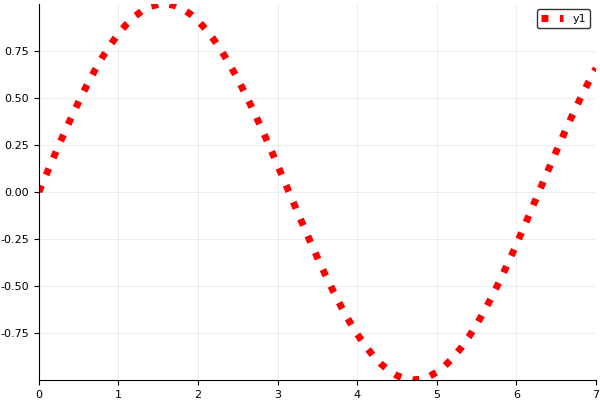

In [6]:
pyplot(); plot(sin,0:0.1:7,line=(:red,5,:dot))


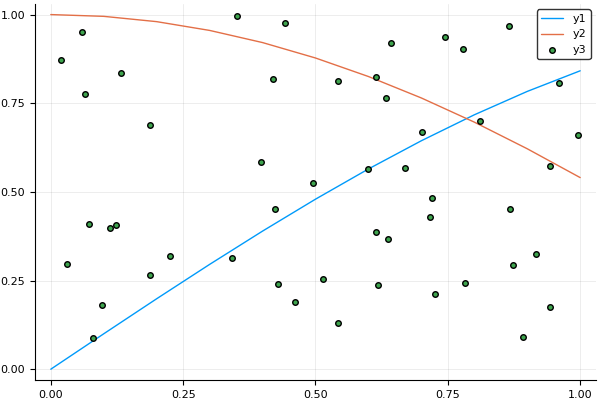

In [9]:
plot(sin,0:0.1:1)
plot!(cos,0:0.1:1)
scatter!(rand(50),rand(50))

In [67]:
?scatter

search: scatter scatter! scatter3d scatter3d! scatterhist scatterhist!



No documentation found.

`Plots.scatter` is a `Function`.

```
# 1 method for generic function "scatter":
scatter(args...; kw...) in Plots at /opt/julia_packages/.julia/v0.6/RecipesBase/src/RecipesBase.jl:359
```


In [11]:
using DataFrames

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.6/DataFrames.ji for module DataFrames.


In [13]:
slideTime=DataFrames.readtable("slideTimes.csv",separator=';')

LoadError: [91mSystemError: opening file slideTimes.csv: No such file or directory[39m

In [15]:
?directory

search: redirect_stdout

Couldn't find directory
Perhaps you meant BitVector


No documentation found.

Binding `directory` does not exist.
